## Observations and Insights

## Dependencies and starter code

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

MouseMetaData = "data/Mouse_metadata.csv"
StudyResults = "data/Study_results.csv"


MouseMetaData = pd.read_csv(MouseMetaData)
StudyResults = pd.read_csv(StudyResults)



## Summary statistics

In [18]:
CombinedData = pd.merge(MouseMetaData, StudyResults, on="Mouse ID")
CombinedData.info()

SummaryData = CombinedData[["Drug Regimen", "Tumor Volume (mm3)"]]
GroupByData = SummaryData.groupby(["Drug Regimen"])

Summarydf = pd.DataFrame({
    "Mean": GroupByData["Tumor Volume (mm3)"].mean().map('{:.2f}'.format),
    "Median": GroupByData["Tumor Volume (mm3)"].median().map('{:.2f}'.format),
    "Mode": GroupByData["Tumor Volume (mm3)"].agg(pd.Series.mode).map('{:.2f}'.format),
    "Variance": GroupByData["Tumor Volume (mm3)"].var().map('{:.2f}'.format),
    "Standard Variance": GroupByData["Tumor Volume (mm3)"].std().map('{:.2f}'.format),
    "SEM": GroupByData["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)
})

Summarydf.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


,Mean,Median,Mode,Variance,Standard Variance,SEM
Drug Regimen,,,,,,
Capomulin,40.68,41.56,45.00,24.95,4.99,0.33
Ceftamin,52.59,51.78,45.00,39.29,6.27,0.47
Infubinol,52.88,51.82,45.00,43.13,6.57,0.49
Ketapril,55.24,53.70,45.00,68.55,8.28,0.60
Naftisol,54.33,52.51,45.00,66.17,8.13,0.60


## Bar plots

In [19]:
CombinedData.groupby("Drug Regimen")
GroupByData = CombinedData.groupby("Drug Regimen")
Summarydf = GroupByData["Tumor Volume (mm3)"].mean().to_frame()
Summarydf.head()

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565


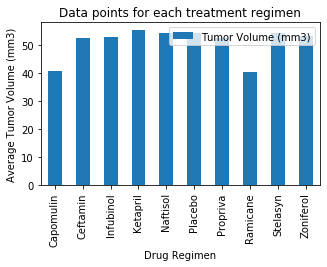

<Figure size 432x288 with 0 Axes>

In [20]:
Summarydf.plot(kind="bar", figsize=(5,3))
plt.title("Data points for each treatment regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
plt.tight_layout()

## Pie plots

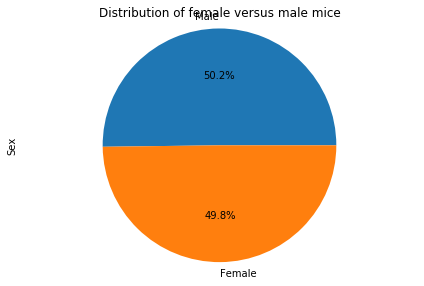

In [22]:
MiceNumbers = MouseMetaData["Sex"].value_counts()
plt.figure()
MiceNumbers.plot(kind="pie", autopct='%1.1f%%')
plt.tight_layout()
plt.axis("equal")
plt.title("Distribution of female versus male mice")
plt.tight_layout()
plt.show()

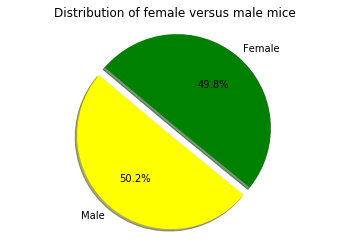

In [25]:
colors = ["yellow","green"]
explode = (0.1,0)
plt.figure()
plt.pie(MiceNumbers.values, explode=explode, labels=MiceNumbers.index.values, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.title("Distribution of female versus male mice")
plt.show()

## Quartiles, outliers and boxplots

In [30]:
RegimenData = CombinedData[(CombinedData["Drug Regimen"] == "Capomulin") | 
                          (CombinedData["Drug Regimen"] == "Ramicane") | 
                          (CombinedData["Drug Regimen"] == "Infubinol") | 
                          (CombinedData["Drug Regimen"] == "Ceftamin")]

RegimenData = RegimenData[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
RegimenData = RegimenData.groupby(["Mouse ID", "Drug Regimen"])
Regimendf = RegimenData["Tumor Volume (mm3)"].sum().to_frame()
RegimenPlot = Regimendf["Tumor Volume (mm3)"]
Regimendf.head()

Quartiles = RegimenPlot.quantile([.25,.5,.75])
LowerQ = quartiles[0.25]
UpperQ = quartiles[0.75]
IQR = UpperQ-LowerQ

print(f"The lower quartile of Tumor Volume (mm3) is: {LowerQ}")
print(f"The upper quartile of Tumor Volume (mm3) is: {UpperQ}")
print(f"The interquartile range of Tumor Volume (mm3) is: {IQR}")
print(f"The the median of Tumor Volume (mm3) is: {Quartiles[0.5]} ")

LowerBound = LowerQ - (1.5*IQR)
UpperBound = UpperQ + (1.5*IQR)
print(f"Values below {LowerBound} could be outliers.")
print(f"Values above {UpperBound} could be outliers.")

The lower quartile of Tumor Volume (mm3) is: 340.0010610275
The upper quartile of Tumor Volume (mm3) is: 449.98455965499994
The interquartile range of Tumor Volume (mm3) is: 109.98349862749996
The the median of Tumor Volume (mm3) is: 394.845840265 
Values below 175.02581308625005 could be outliers.
Values above 614.9598075962499 could be outliers.


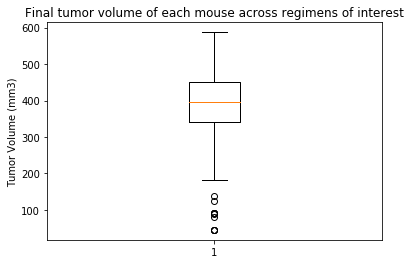

In [32]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final tumor volume of each mouse across regimens of interest')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(RegimenPlot)
plt.show()

## Line and scatter plots

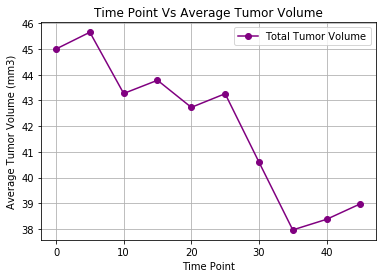

In [35]:
TumorData = CombinedData[(CombinedData["Drug Regimen"] == "Capomulin") & (CombinedData["Mouse ID"] == "b128")]
TumorData = TumorData.groupby(["Drug Regimen", "Timepoint"])
TumorDatadf = TumorData["Tumor Volume (mm3)"].mean().to_frame()
TumorIndexDatadf = TumorDatadf.unstack(0)
TumorPlotdf = TumorIndexDatadf["Tumor Volume (mm3)"]

xAxis = [0,5,10,15,20,25,30,35,40,45]
plt.figure()
TumorTotal, = plt.plot(xAxis, TumorPlotdf["Capomulin"], marker= "o", color="purple", label="Total Tumor Volume" )
plt.legend(handles=[TumorTotal], loc="best")
plt.title("Time Point Vs Average Tumor Volume")
# plt.xlim(-10, 50)
# plt.ylim(30, 50)
plt.xlabel("Time Point")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

In [36]:
ScatterData = CombinedData[(CombinedData["Drug Regimen"] == "Capomulin")]
ScatterData = ScatterData[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
GroupByData = ScatterData.groupby(["Mouse ID","Weight (g)"])
ScatterDatadf = GroupByData["Tumor Volume (mm3)"].mean().to_frame()
ScatterDatadf = ScatterDatadf.reset_index()
ScatterDatadf.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


<Figure size 432x288 with 0 Axes>

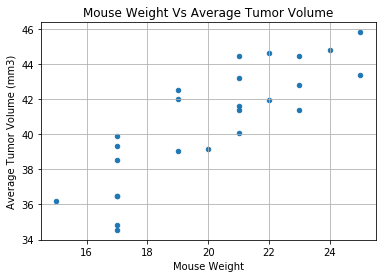

In [37]:
plt.figure()
ScatterDatadf.plot(x="Weight (g)", y="Tumor Volume (mm3)", kind = "scatter", marker="o")

plt.title("Mouse Weight Vs Average Tumor Volume")
# plt.xlim(10, 25)
# plt.ylim(30, 50)
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

In [39]:
Correlation = st.pearsonr(ScatterDatadf["Weight (g)"], ScatterDatadf["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(Correlation[0],2)}")

The correlation between both factors is 0.84


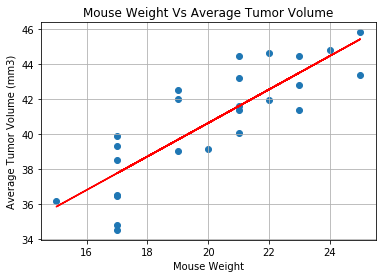

In [41]:
XValues = ScatterDatadf["Weight (g)"]
YValues = ScatterDatadf["Tumor Volume (mm3)"]
plt.figure()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(XValues, YValues)
RegressionValues = XValues * slope + intercept
LineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(XValues,YValues)
plt.plot(XValues,RegressionValues,"r-")
# plt.xlim(13, 26)
# plt.ylim(30, 50)
plt.title("Mouse Weight Vs Average Tumor Volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()